**Australian Credit Approval**

This real dataset concerns credit card applications. All attribute names and values have been changed to meaningless symbols to protect confidentiality of the data. 
The dataset can be found on https://archive.ics.uci.edu/ml/datasets/Statlog+%28Australian+Credit+Approval%29

In [42]:
#import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [43]:
df=pd.read_csv("Aust_Credit_Approval_Data.csv")
df.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,target
0,22.08,11.46,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,22.67,7.00,2,8,4,0.165,0,0,0,0,2,160,1,0
2,29.58,1.75,1,4,4,1.250,0,0,0,1,2,280,1,0
3,21.67,11.50,1,5,3,0.000,1,1,11,1,2,0,1,1
4,20.17,8.17,2,6,4,1.960,1,1,14,0,2,60,159,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 14 columns):
x1        690 non-null float64
x2        690 non-null float64
x3        690 non-null int64
x4        690 non-null int64
x5        690 non-null int64
x6        690 non-null float64
x7        690 non-null int64
x8        690 non-null int64
x9        690 non-null int64
x10       690 non-null int64
x11       690 non-null int64
x12       690 non-null int64
x13       690 non-null int64
target    690 non-null int64
dtypes: float64(3), int64(11)
memory usage: 75.5 KB


In [5]:
df.describe()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,target
count,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.00000,690.000000,690.000000,690.000000,690.000000,690.000000
mean,31.568203,4.758725,1.766667,7.372464,4.692754,2.223406,0.523188,0.427536,2.40000,0.457971,1.928986,184.014493,1018.385507,0.444928
std,11.853273,4.978163,0.430063,3.683265,1.992316,3.346513,0.499824,0.495080,4.86294,0.498592,0.298813,172.159274,5210.102598,0.497318
min,13.750000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000,0.000000,1.000000,0.000000
25%,22.670000,1.000000,2.000000,4.000000,4.000000,0.165000,0.000000,0.000000,0.00000,0.000000,2.000000,80.000000,1.000000,0.000000
50%,28.625000,2.750000,2.000000,8.000000,4.000000,1.000000,1.000000,0.000000,0.00000,0.000000,2.000000,160.000000,6.000000,0.000000
75%,37.707500,7.207500,2.000000,10.000000,5.000000,2.625000,1.000000,1.000000,3.00000,1.000000,2.000000,272.000000,396.500000,1.000000
max,80.250000,28.000000,3.000000,14.000000,9.000000,28.500000,1.000000,1.000000,67.00000,1.000000,3.000000,2000.000000,100001.000000,1.000000


**no missing values, all catogorical data has already been transformed**

In [6]:
df["target"].value_counts()

0    383
1    307
Name: target, dtype: int64

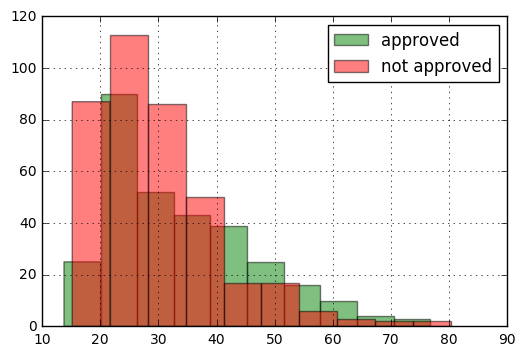

In [45]:
df[df["target"]==1]["x1"].hist(alpha=0.5,color="green",label="approved")
df[df["target"]==0]["x1"].hist(alpha=0.5,color="red",label="not approved")
plt.legend()

**it seems like x1 is the age column, so I create this plot and see that the majority people apply for a credit card between 20-40,and when you are young, it can be tough to get approved but when you get older and financially stable it is much easier for you to get approved for a credit card!**

In [20]:
from sklearn.model_selection import train_test_split
X = df.drop("target", axis = 1)
y = df["target"]

In [25]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42)

In [30]:
#Importing and  training the Support Vector Classifier
from sklearn.svm import SVC
svm_model = SVC(gamma='auto')
svm_model.fit(X_train,y_train)
predictions = svm_model.predict(X_test)

In [31]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[123   3]
 [ 78   3]]
              precision    recall  f1-score   support

           0       0.61      0.98      0.75       126
           1       0.50      0.04      0.07        81

   micro avg       0.61      0.61      0.61       207
   macro avg       0.56      0.51      0.41       207
weighted avg       0.57      0.61      0.48       207



In [ ]:
#grid search for best parameter
param_grid = {'C': [0.01,0.1, 10, 100, 1000],
              'gamma': [1,0.1,0.01,0.001,0.0001]}
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(SVC(), param_grid,cv=10)
grid.fit(X_train, y_train)

In [ ]:
grid.best_params_

In [38]:
grid_predictions = grid.predict(X_test)
print(confusion_matrix(y_test,grid_predictions))
print(classification_report(y_test,grid_predictions))

[[107  19]
 [ 28  53]]
              precision    recall  f1-score   support

           0       0.79      0.85      0.82       126
           1       0.74      0.65      0.69        81

   micro avg       0.77      0.77      0.77       207
   macro avg       0.76      0.75      0.76       207
weighted avg       0.77      0.77      0.77       207



**With gridsearch after finding the best values of the parameters, we see the model is improved!**